<a href="https://colab.research.google.com/github/Nishilhmodi/Codsoft-Internship/blob/main/Task_2_MovieRating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
#**MovieRating_Prediction**
---
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
dataset = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')

In [ ]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
dataset.shape

(15509, 10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
dataset.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [ ]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
dataset.duplicated().sum()

6

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(5659, 10)

In [ ]:
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.shape

(5659, 10)

In [ ]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
dataset['Genre'] = dataset['Genre'].str.split(', ')
dataset = dataset.explode('Genre')
dataset['Genre'].fillna(dataset['Genre'].mode()[0],inplace=True)

In [ ]:
dataset.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [ ]:
top_movie = dataset.loc[dataset['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,-2020.0,94,Drama,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
8339,Love Qubool Hai,-2020.0,94,Romance,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
8339,Love Qubool Hai,-2020.0,94,Drama,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
8339,Love Qubool Hai,-2020.0,94,Romance,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,-2021.0,79,Music,9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
5410,Half Songs,-2021.0,79,Romance,9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
5410,Half Songs,-2021.0,79,Music,9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
5410,Half Songs,-2021.0,79,Romance,9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
5077,Gho Gho Rani,-2019.0,105,History,9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
5077,Gho Gho Rani,-2019.0,105,Romance,9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


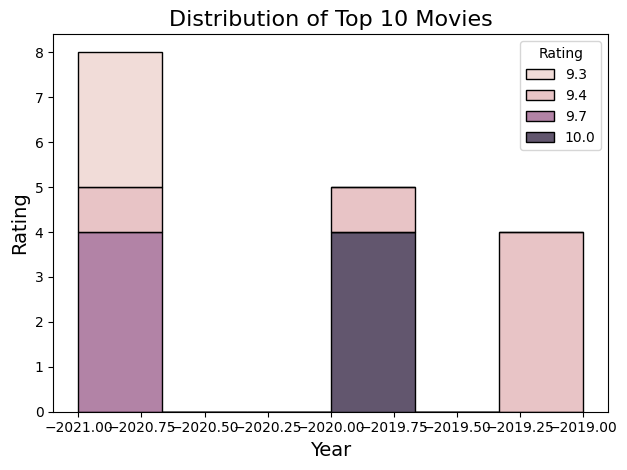

In [ ]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
genre_counts = dataset['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,3796
1,Action,1686
2,Romance,1380
3,Comedy,1344
4,Crime,875


In [ ]:
year = px.histogram(dataset, x='Year',histnorm='probability density',nbins = 30)
year.show()

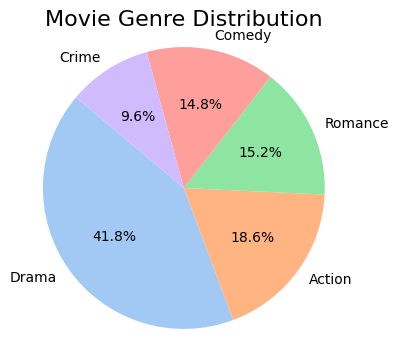

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [ ]:
director_avg_rating = dataset.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
1833,Saif Ali Sayeed,10.0
2107,Sriram Raja,9.7
274,Arvind Pratap,9.4
1240,Munni Pankaj,9.4
2142,Suhrud Godbole,9.4
1306,Nikhil Mahar,9.3
1528,Rahul Mallick,9.3
2309,Venkatesh Bk,9.3
635,Gautam Joshi,9.3
1515,Raghav Jairath,9.3


<ipython-input-40-1edc1455cb1a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




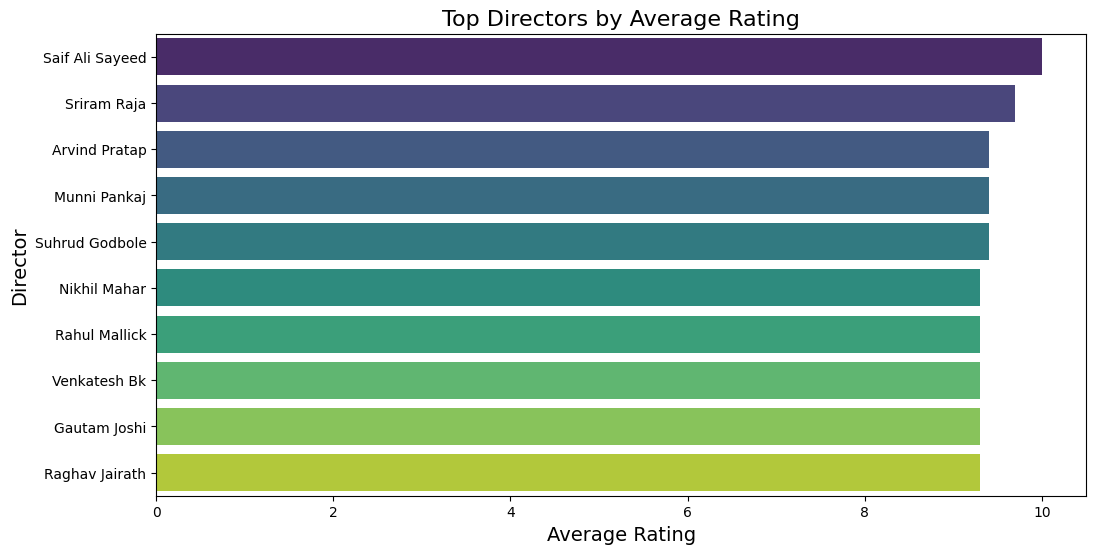

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

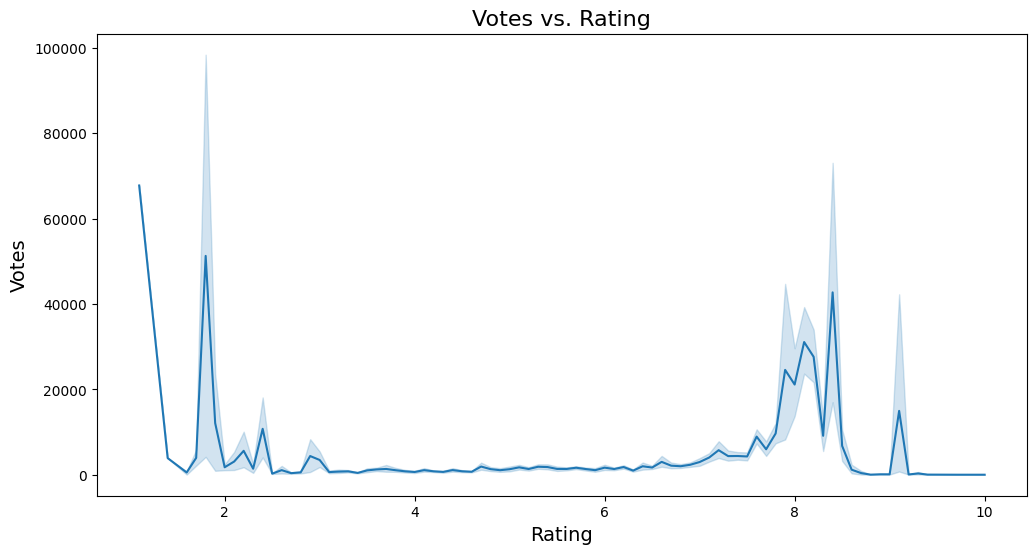

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

In [ ]:
actor_counts = dataset['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Amitabh Bachchan,266
1,Akshay Kumar,213
2,Ashok Kumar,202
3,Dharmendra,195
4,Jeetendra,190
5,Ajay Devgn,188
6,Mithun Chakraborty,186
7,Rajesh Khanna,178
8,Shashi Kapoor,167
9,Sanjay Dutt,160


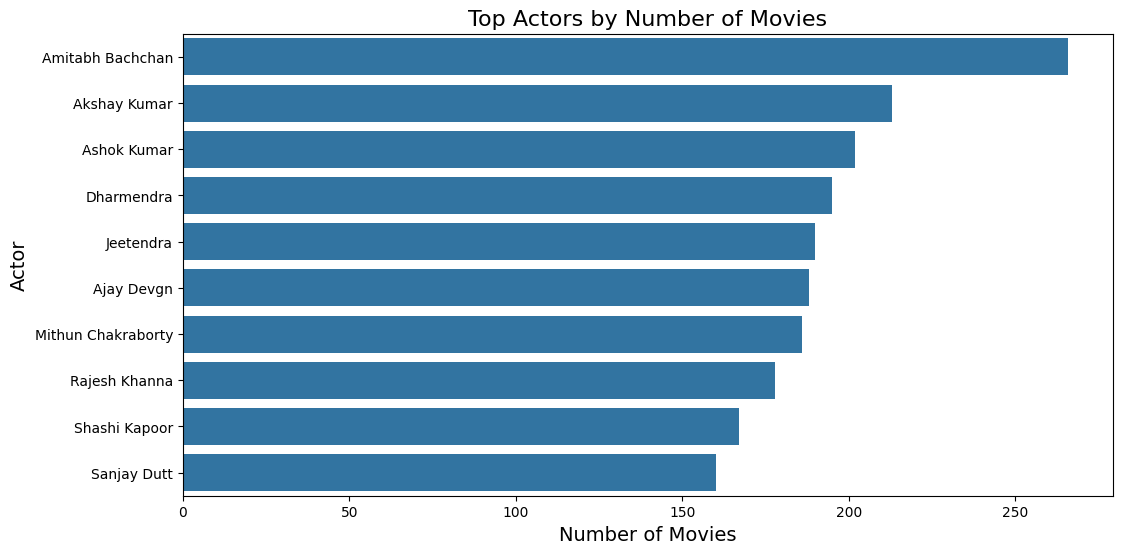

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()

In [ ]:
yearly_movie_counts = dataset['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
42,-2021.0,121
13,-2020.0,273
0,-2019.0,423
3,-2018.0,358
2,-2017.0,372
...,...,...
82,-1935.0,6
88,-1934.0,3
89,-1933.0,2
90,-1932.0,2


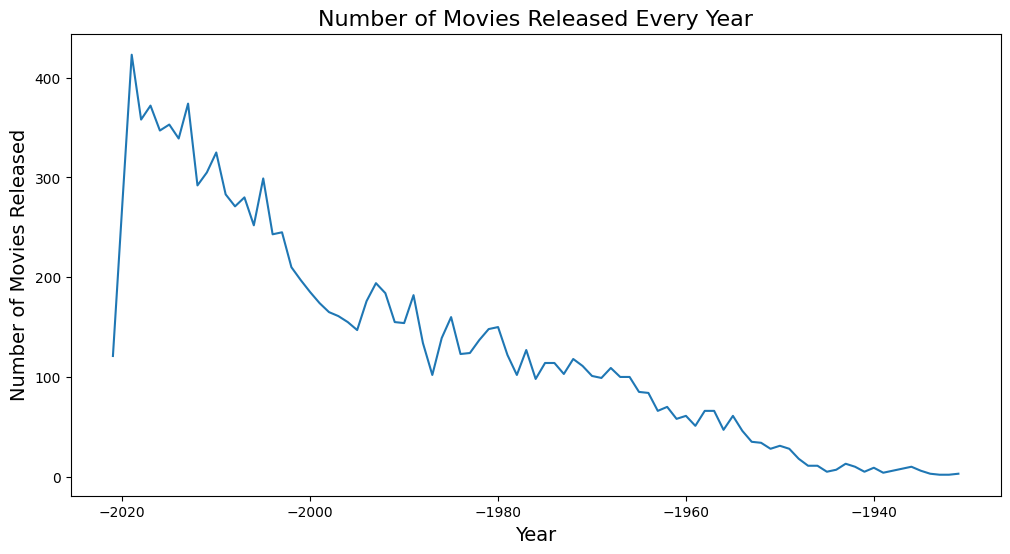

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()

In [ ]:
filtered_df = dataset[(dataset['Rating'] > 8) & (dataset['Votes'] > 10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,-2009.0,170,Comedy,8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
75,3 Idiots,-2009.0,170,Drama,8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,-2008.0,104,Action,8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
173,A Wednesday,-2008.0,104,Crime,8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
173,A Wednesday,-2008.0,104,Drama,8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,-1971.0,122,Drama,8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
981,Anand,-1971.0,122,Musical,8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,-1994.0,160,Action,8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1009,Andaz Apna Apna,-1994.0,160,Comedy,8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1009,Andaz Apna Apna,-1994.0,160,Romance,8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon


<ipython-input-47-7992599c795c>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



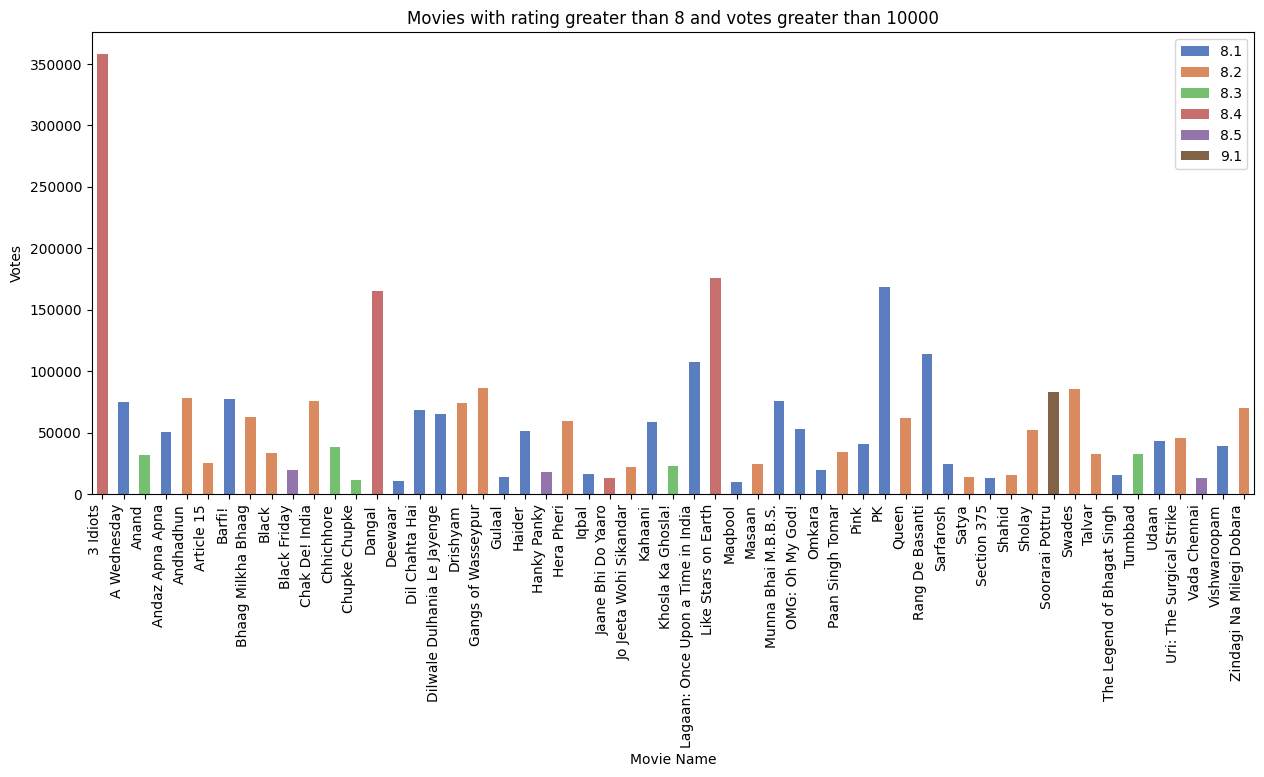

In [ ]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')

plt.show()

In [ ]:
dataset['Genre'] = dataset['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = dataset.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,-2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,-1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,-1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,-1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,-1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


<ipython-input-52-7a5d1598b480>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




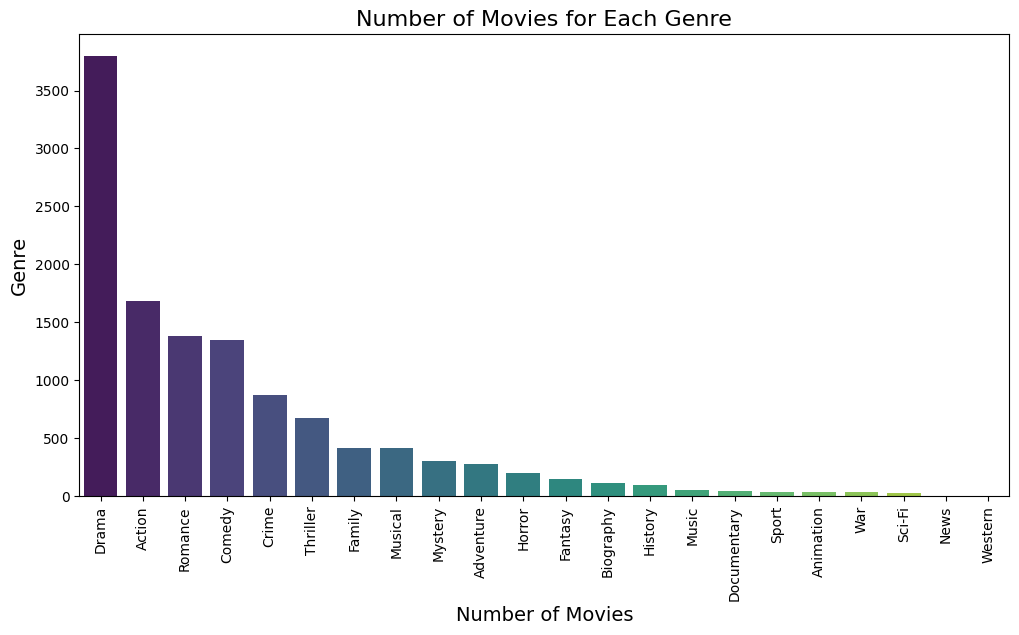

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

<ipython-input-53-1db34de9f846>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




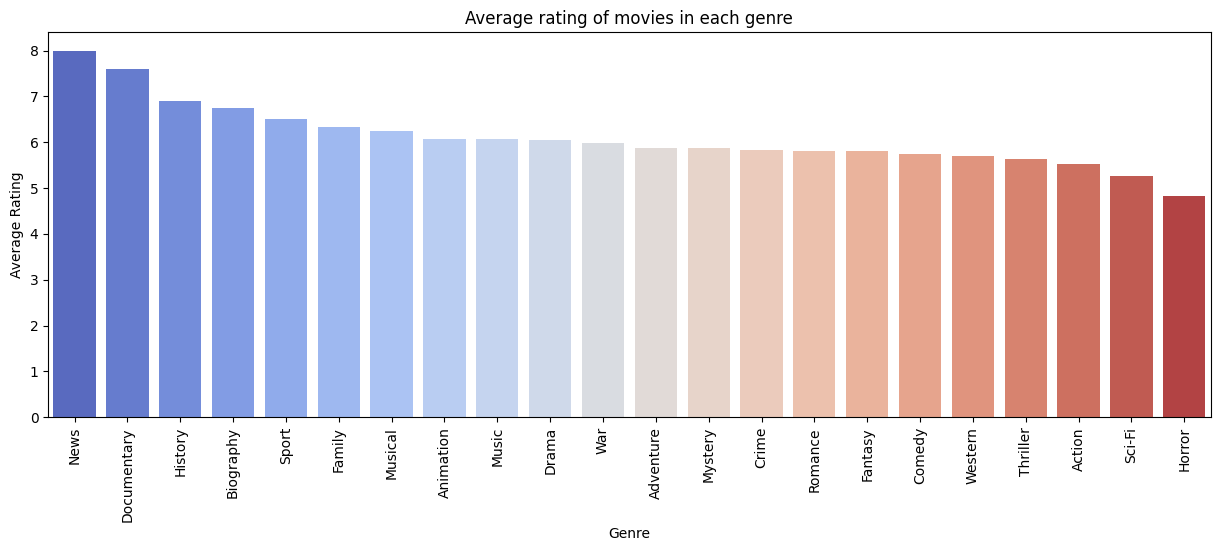

In [ ]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)


plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = dataset.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(dataset['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(dataset['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(dataset['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(dataset['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(dataset['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019,109,7,7.0,8,629,1352,2272,319
3,-2019,110,4,4.4,35,1335,1198,719,2148
3,-2019,110,16,4.4,35,1335,1198,719,2148
5,-1997,147,4,4.7,827,1530,378,75,2045
5,-1997,147,7,4.7,827,1530,378,75,2045


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.022222,0.293333,0.333333,0.662921,0.000005,0.258848,0.690148,0.979310,0.124853
1,0.022222,0.296667,0.190476,0.370787,0.000051,0.549383,0.611536,0.309914,0.840705
2,0.022222,0.296667,0.761905,0.370787,0.000051,0.549383,0.611536,0.309914,0.840705
3,0.266667,0.420000,0.190476,0.404494,0.001390,0.629630,0.192956,0.032328,0.800391
4,0.266667,0.420000,0.333333,0.404494,0.001390,0.629630,0.192956,0.032328,0.800391


In [ ]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Year        0.234077
Votes       0.156555
Actor 2     0.045677
Actor 3     0.036232
Duration    0.033128
Genre       0.023605
Actor 1     0.013785
Director   -0.002346
Name: Rating, dtype: float64

<Axes: >

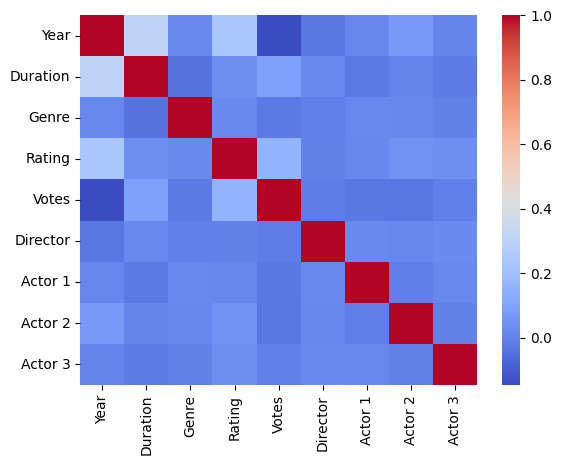

In [ ]:
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test = np.array(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5.80086272, 5.83401998, 6.15441441, ..., 6.25934034, 5.45691932,
       6.10224232])

In [ ]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.09933134624297013
Mean squared error:  1.6807332027210908
Mean absolute error:  1.0307412861435645


In [ ]:
print(y_test)

6765     3.6
14443    6.3
13666    7.4
1525     7.3
5689     4.2
        ... 
2493     7.0
9376     6.4
9913     6.8
14848    3.8
3826     5.5
Name: Rating, Length: 3594, dtype: float64
